### 处理一下预测结果

In [9]:
import pandas as pd
pd.set_option('display.max_rows', 5)

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'serif',  # 使用衬线字体
    'font.serif': ['Times New Roman'],  # 指定 Times New Roman 字体
    'font.size': 12,
    'text.usetex': False,
    'axes.labelsize': 13,
    'axes.titlesize': 15,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
    'legend.fontsize': 11,
    'legend.title_fontsize': 12,
    'savefig.bbox': 'tight',
    # 'lines.linewidth': 2,
    # 'lines.markersize': 6,
    # 'grid.linewidth': 1,
    # 'axes.linewidth': 1
})
sns.set_style("whitegrid")
flierprops = dict(marker='o', markersize=3, linestyle='none')

#### 1. 读数据

In [10]:
fig_dir = "/home/zhaoy/asset-fastCAE/results/vvenc/figs"
table_dir = "/home/zhaoy/asset-fastCAE/results/vvenc/tables"

rlt_df  = pd.read_csv(f"{table_dir}/predCurve/all_rlts.csv")
display(rlt_df)

,preset,size,input,regressor,train_rmse,train_r2,train_evs,test_rmse,test_r2,test_evs,func,target
0,faster,1080P,(fasterx360P),RandomForestRegressor,0.360312,[0.9921997 0.99221938],[0.99219978 0.99221954],58.379096,[0.23710321 0.3123332 ],[0.70989774 0.74173112],linear,bitrate
1,faster,540P,(fasterx360P),RandomForestRegressor,0.071734,[0.99823675 0.99830123],[0.99824069 0.99830538],16.405336,[0.66758668 0.74528954],[0.85411623 0.89168295],linear,bitrate
...,...,...,...,...,...,...,...,...,...,...,...,...
25342,slower,540P,(slowerx1080P),RMSProp,0.000295,[ 0.33565719 -0.07599478 -0.91199407],[ 0.48660322 -0.04018703 0.28586697],0.009328,[-0.74454773 -2.8715583 -0.61868638],[ 0.15460687 -0.00969976 -0.15057627],quadratic3,log2vmaf
25343,slower,720P,(slowerx1080P),RMSProp,0.000182,[-0.11805662 -0.01737059 0.11225351],[0.4733063 0.02989877 0.52038464],0.006005,[-0.12697504 -2.06221775 -0.10085728],[0.31570612 0.13317094 0.26381047],quadratic3,log2vmaf


In [11]:
pred_df = pd.read_csv(f"{table_dir}/predCurve/all_preds.csv")
pred_df = pred_df.sort_values(["regressor", "seqName", "sceneId", "preset", "size"]).reset_index(drop=True)
display(pred_df)

,seqName,sceneId,regressor,input,preset,size,p1,p2,pred_p1,pred_p2,func,target,p3,pred_p3
0,Lecture-42c3,0,Adam,(faster)x(360P),faster,1080P,-30.682357,1586.304457,-81.753967,2473.837158,linear,bitrate,NaN,NaN
1,Lecture-42c3,0,Adam,(medium)x(360P),faster,1080P,-30.682357,1586.304457,-83.070061,2523.051270,linear,bitrate,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608254,Lecture-7e40,1,SGDRegressor,(medium)x(1080P),slower,720P,-0.000641,0.034761,-0.000527,0.022460,quadratic3,log2vmaf,6.145511,6.287401
608255,Lecture-7e40,1,SGDRegressor,(slower)x(1080P),slower,720P,-0.000641,0.034761,-0.000503,0.015756,quadratic3,log2vmaf,6.145511,6.344881


In [4]:
pred_df["seqName"].unique().tolist()

['Lecture-42c3',
 'Lecture-4bb4',
 'Lecture-5f3a',
 'Lecture-6d29',
 'Lecture-7e40']

In [12]:
enc_df  = pd.read_csv(f"{table_dir}/encInfo.csv")
display(enc_df)

# 找出在测试集中的序列
enc_df = enc_df[enc_df["seqName"].isin(pred_df["seqName"].unique())]
enc_df = enc_df.sort_values(["seqName", "sceneId", "preset", "size"]).reset_index(drop=True)
display(enc_df)

,seqName,sceneId,qp,preset,size,nframes,bitrate,psnr,ssim,vmaf,log2psnr,log2ssim,log2bitrate,log2vmaf,bpp
0,Lecture-1033,0,32,faster,360P,281,57.8571,47.754628,0.997213,95.285921,5.577569,-0.004026,5.854422,6.574191,0.008371
1,Lecture-1033,2,27,faster,360P,285,190.5078,49.755053,0.995836,95.477799,5.636771,-0.006020,7.573706,6.577093,0.027562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25022,Lecture-07e0,1,52,faster,1080P,67,107.3409,30.605672,0.946040,56.786558,4.935727,-0.080027,6.746056,5.827478,0.001726
25023,Lecture-07e0,0,27,faster,1080P,534,1331.7007,47.422266,0.994509,94.862555,5.567493,-0.007944,10.379054,6.567767,0.021407


,seqName,sceneId,qp,preset,size,nframes,bitrate,psnr,ssim,vmaf,log2psnr,log2ssim,log2bitrate,log2vmaf,bpp
0,Lecture-42c3,0,27,faster,1080P,49,733.5037,51.042041,0.997093,96.719900,5.673614,-0.004199,9.518660,6.595741,0.011791
1,Lecture-42c3,0,42,faster,1080P,49,239.1673,41.030000,0.976465,88.216135,5.358607,-0.034359,7.901876,6.462971,0.003845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,Lecture-7e40,1,52,slower,720P,103,57.5278,32.519320,0.944059,73.387421,5.023225,-0.083052,5.846187,6.197461,0.002081
1847,Lecture-7e40,1,42,slower,720P,103,164.8311,39.124660,0.979617,89.811787,5.290006,-0.029710,7.364845,6.488833,0.005962


In [5]:
pd.set_option('display.max_rows', 6)
pred_df["regressor"].unique()

array(['Adam', 'LinearRegression', 'LinearSVR', 'RMSProp',
       'RandomForestRegressor', 'SGDRegressor'], dtype=object)

In [7]:
pred_df["func"].unique()

array(['linear', 'power', 'quadratic2', 'quadratic3'], dtype=object)

#### 2. 把真实值和预测值合并在一个表里

In [7]:
from utils import func_linear, func_pw2, func_quad2, func_quad3
from tqdm import tqdm

qps = range(22, 57, 5)
func_dict = {
    "linear": func_linear,
    "power": func_pw2,
    "quadratic2": func_quad2,
    "quadratic3": func_quad3
}

rows = []
cols = pred_df.columns.tolist()
for idx, row in tqdm(pred_df.iterrows()):
    func = row['func']
    target = row['target']
    
    base_row = row.to_dict()
    
    for qp in qps:
        expanded_row = base_row.copy()
        expanded_row["qp"] = qp
        if func == "quadratic3":
            expanded_row[f"pred_target"] = func_dict[func](qp, row["pred_p1"], row['pred_p2'], row['pred_p3'])
        else:
            expanded_row[f"pred_target"] = func_dict[func](qp, row["pred_p1"], row['pred_p2'])
        rows.append(expanded_row)
        
pred_df = pd.DataFrame(rows)
display(pred_df)

0it [00:00, ?it/s]

608256it [00:57, 10624.13it/s]


,seqName,sceneId,regressor,input,preset,size,p1,p2,pred_p1,pred_p2,func,target,p3,pred_p3,qp,pred_target
0,Lecture-42c3,0,Adam,(faster)x(360P),faster,1080P,-30.682357,1586.304457,-81.753967,2473.837158,linear,bitrate,NaN,NaN,22,675.249878
1,Lecture-42c3,0,Adam,(faster)x(360P),faster,1080P,-30.682357,1586.304457,-81.753967,2473.837158,linear,bitrate,NaN,NaN,27,266.480042
2,Lecture-42c3,0,Adam,(faster)x(360P),faster,1080P,-30.682357,1586.304457,-81.753967,2473.837158,linear,bitrate,NaN,NaN,32,-142.289795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4257789,Lecture-7e40,1,SGDRegressor,(slower)x(1080P),slower,720P,-0.000641,0.034761,-0.000503,0.015756,quadratic3,log2vmaf,6.145511,6.344881,42,6.119300
4257790,Lecture-7e40,1,SGDRegressor,(slower)x(1080P),slower,720P,-0.000641,0.034761,-0.000503,0.015756,quadratic3,log2vmaf,6.145511,6.344881,47,5.974235
4257791,Lecture-7e40,1,SGDRegressor,(slower)x(1080P),slower,720P,-0.000641,0.034761,-0.000503,0.015756,quadratic3,log2vmaf,6.145511,6.344881,52,5.804019


In [9]:
pred_df = pred_df.merge(
    enc_df[["seqName", "sceneId", "preset", "size", "qp", "bitrate", "log2bitrate", "psnr", "log2psnr", "ssim", "log2ssim", "vmaf", "log2vmaf"]],
    on=["seqName", "sceneId", "preset", "size", "qp"], how="inner"
)
pred_df = pred_df.sort_values(["regressor", "seqName", "sceneId", "preset", "size"]).reset_index(drop=True)
display(pred_df)

,seqName,sceneId,regressor,input,preset,size,p1,p2,pred_p1,pred_p2,...,qp,pred_target,bitrate,log2bitrate,psnr,log2psnr,ssim,log2ssim,vmaf,log2vmaf
0,Lecture-42c3,0,Adam,(faster)x(360P),faster,1080P,-30.682357,1586.304457,-81.753967,2473.837158,...,22,675.249878,1038.4604,10.020230,54.06102,5.756517,0.998422,-0.002279,97.265945,6.603863
1,Lecture-42c3,0,Adam,(medium)x(360P),faster,1080P,-30.682357,1586.304457,-83.070061,2523.051270,...,22,695.509933,1038.4604,10.020230,54.06102,5.756517,0.998422,-0.002279,97.265945,6.603863
2,Lecture-42c3,0,Adam,(slower)x(360P),faster,1080P,-30.682357,1586.304457,-72.334854,3078.064209,...,22,1486.697418,1038.4604,10.020230,54.06102,5.756517,0.998422,-0.002279,97.265945,6.603863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4257789,Lecture-7e40,1,SGDRegressor,(faster)x(1080P),slower,720P,-0.000641,0.034761,-0.000345,0.011453,...,52,6.092571,57.5278,5.846187,32.51932,5.023225,0.944059,-0.083052,73.387421,6.197461
4257790,Lecture-7e40,1,SGDRegressor,(medium)x(1080P),slower,720P,-0.000641,0.034761,-0.000527,0.022460,...,52,6.029500,57.5278,5.846187,32.51932,5.023225,0.944059,-0.083052,73.387421,6.197461
4257791,Lecture-7e40,1,SGDRegressor,(slower)x(1080P),slower,720P,-0.000641,0.034761,-0.000503,0.015756,...,52,5.804019,57.5278,5.846187,32.51932,5.023225,0.944059,-0.083052,73.387421,6.197461


In [10]:
pred_df["err"] = pred_df.apply(lambda x: x[x["target"]] - x["pred_target"], axis=1)
display(pred_df)

pred_df.to_csv(f"{table_dir}/predCurve/combined_preds.csv", index=False)

,seqName,sceneId,regressor,input,preset,size,p1,p2,pred_p1,pred_p2,...,pred_target,bitrate,log2bitrate,psnr,log2psnr,ssim,log2ssim,vmaf,log2vmaf,err
0,Lecture-42c3,0,Adam,(faster)x(360P),faster,1080P,-30.682357,1586.304457,-81.753967,2473.837158,...,675.249878,1038.4604,10.020230,54.06102,5.756517,0.998422,-0.002279,97.265945,6.603863,363.210522
1,Lecture-42c3,0,Adam,(medium)x(360P),faster,1080P,-30.682357,1586.304457,-83.070061,2523.051270,...,695.509933,1038.4604,10.020230,54.06102,5.756517,0.998422,-0.002279,97.265945,6.603863,342.950467
2,Lecture-42c3,0,Adam,(slower)x(360P),faster,1080P,-30.682357,1586.304457,-72.334854,3078.064209,...,1486.697418,1038.4604,10.020230,54.06102,5.756517,0.998422,-0.002279,97.265945,6.603863,-448.237018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4257789,Lecture-7e40,1,SGDRegressor,(faster)x(1080P),slower,720P,-0.000641,0.034761,-0.000345,0.011453,...,6.092571,57.5278,5.846187,32.51932,5.023225,0.944059,-0.083052,73.387421,6.197461,0.104890
4257790,Lecture-7e40,1,SGDRegressor,(medium)x(1080P),slower,720P,-0.000641,0.034761,-0.000527,0.022460,...,6.029500,57.5278,5.846187,32.51932,5.023225,0.944059,-0.083052,73.387421,6.197461,0.167961
4257791,Lecture-7e40,1,SGDRegressor,(slower)x(1080P),slower,720P,-0.000641,0.034761,-0.000503,0.015756,...,5.804019,57.5278,5.846187,32.51932,5.023225,0.944059,-0.083052,73.387421,6.197461,0.393442


In [11]:
display(pred_df[pred_df["target"] == "log2bitrate"].reset_index(drop=True))

,seqName,sceneId,regressor,input,preset,size,p1,p2,pred_p1,pred_p2,...,pred_target,bitrate,log2bitrate,psnr,log2psnr,ssim,log2ssim,vmaf,log2vmaf,err
0,Lecture-42c3,0,Adam,(faster)x(360P),faster,1080P,-0.116020,12.690890,-0.182459,14.206025,...,10.191929,1038.4604,10.020230,54.06102,5.756517,0.998422,-0.002279,97.265945,6.603863,-0.171699
1,Lecture-42c3,0,Adam,(medium)x(360P),faster,1080P,-0.116020,12.690890,-0.168166,14.887069,...,11.187411,1038.4604,10.020230,54.06102,5.756517,0.998422,-0.002279,97.265945,6.603863,-1.167180
2,Lecture-42c3,0,Adam,(slower)x(360P),faster,1080P,-0.116020,12.690890,-0.177066,13.526820,...,9.631359,1038.4604,10.020230,54.06102,5.756517,0.998422,-0.002279,97.265945,6.603863,0.388871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532221,Lecture-7e40,1,SGDRegressor,(faster)x(1080P),slower,720P,0.000388,-0.179816,0.001185,-0.240942,...,5.776994,57.5278,5.846187,32.51932,5.023225,0.944059,-0.083052,73.387421,6.197461,0.069194
532222,Lecture-7e40,1,SGDRegressor,(medium)x(1080P),slower,720P,0.000388,-0.179816,0.001151,-0.256172,...,5.959947,57.5278,5.846187,32.51932,5.023225,0.944059,-0.083052,73.387421,6.197461,-0.113760
532223,Lecture-7e40,1,SGDRegressor,(slower)x(1080P),slower,720P,0.000388,-0.179816,0.001546,-0.285220,...,5.042567,57.5278,5.846187,32.51932,5.023225,0.944059,-0.083052,73.387421,6.197461,0.803621


In [12]:
pred_df.columns

Index(['seqName', 'sceneId', 'regressor', 'input', 'preset', 'size', 'p1',
       'p2', 'pred_p1', 'pred_p2', 'func', 'target', 'p3', 'pred_p3', 'qp',
       'pred_target', 'bitrate', 'log2bitrate', 'psnr', 'log2psnr', 'ssim',
       'log2ssim', 'vmaf', 'log2vmaf', 'err'],
      dtype='object')

In [28]:
def rm_outliers(df, cols, threshold=1.5, lower_only=False):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - (threshold * IQR)
        upper_bound = Q3 + (threshold * IQR)

        if lower_only:
            df = df[df[col] >= lower_bound]
        else:
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

In [18]:
pred_df = pd.read_csv(f"{table_dir}/predCurve/combined_preds.csv")

##### bitrate / log2bitrate 最适合 quadratic2 函数拟合，然后用任意一种 regressor 效果都差不多

<Axes: xlabel='func', ylabel='err'>

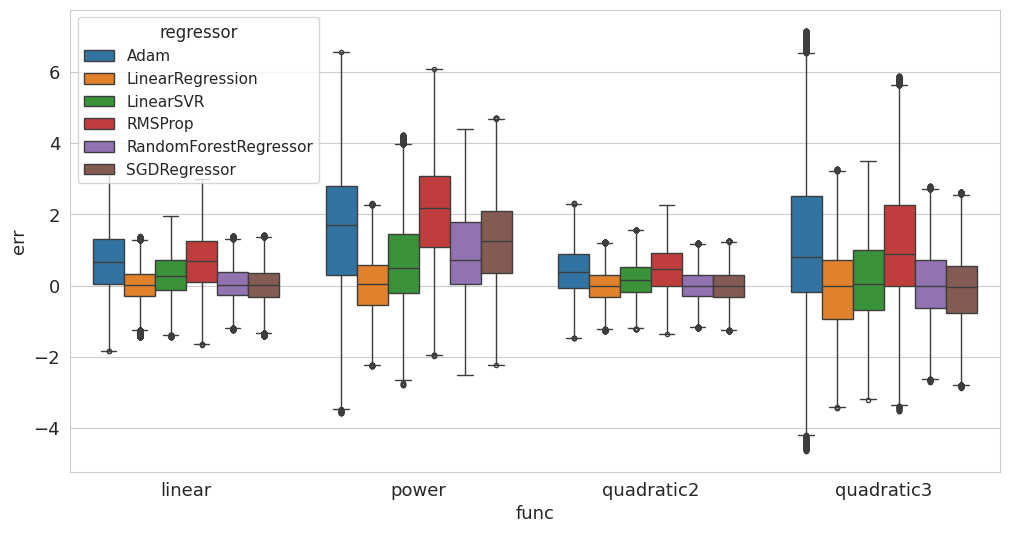

In [42]:
plt.figure(figsize=(12, 6))
log2bitrate_df = pred_df[pred_df["target"] == "log2bitrate"]

log2bitrate_df_cleaned = pd.DataFrame()
for regressor in log2bitrate_df["regressor"].unique():
    for func in log2bitrate_df["func"].unique():
        df = log2bitrate_df[(log2bitrate_df["func"] == func) & (log2bitrate_df["regressor"] == regressor)]
        df = rm_outliers(df, cols=["err"], threshold=1.5)
        
        log2bitrate_df_cleaned = pd.concat([log2bitrate_df_cleaned, df], ignore_index=True)

sns.boxplot(data=log2bitrate_df_cleaned, x="func", y="err", hue="regressor", flierprops=flierprops)

(-1500.0, 2000.0)

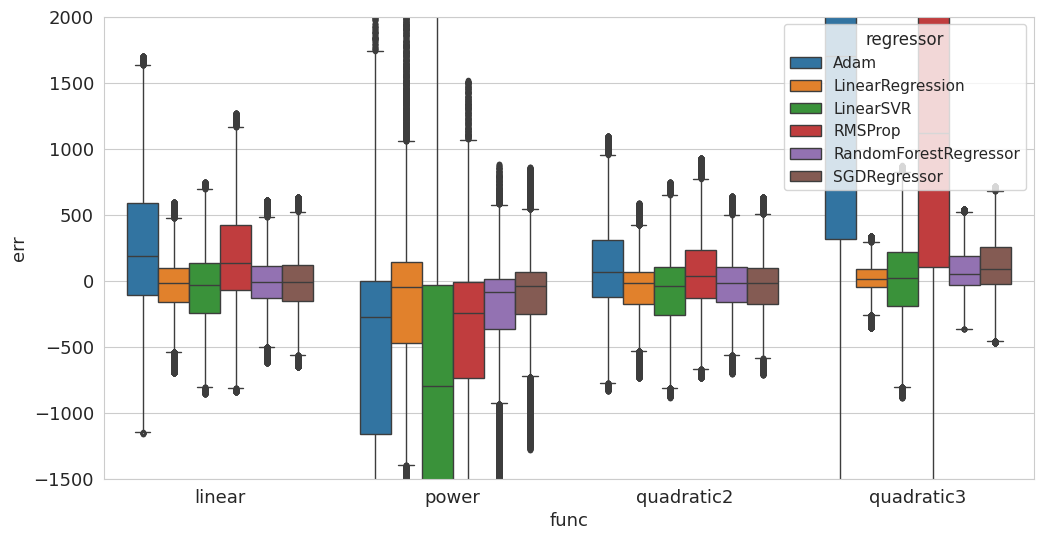

In [47]:
plt.figure(figsize=(12, 6))
bitrate_df = pred_df[pred_df["target"] == "bitrate"]

bitrate_df_cleaned = pd.DataFrame()
for regressor in bitrate_df["regressor"].unique():
    for func in bitrate_df["func"].unique():
        df = bitrate_df[(bitrate_df["func"] == func) & (bitrate_df["regressor"] == regressor)]
        df = rm_outliers(df, cols=["err"], threshold=1.25)
        bitrate_df_cleaned = pd.concat([bitrate_df_cleaned, df], ignore_index=True)
        
sns.boxplot(data=bitrate_df_cleaned, x="func", y="err", hue="regressor", flierprops=flierprops)
plt.ylim(-1500, 2000)

##### log2psnr 最适合 quadratic2 函数拟合，然后用任意一种 regressor 效果都差不多

<Axes: xlabel='func', ylabel='err'>

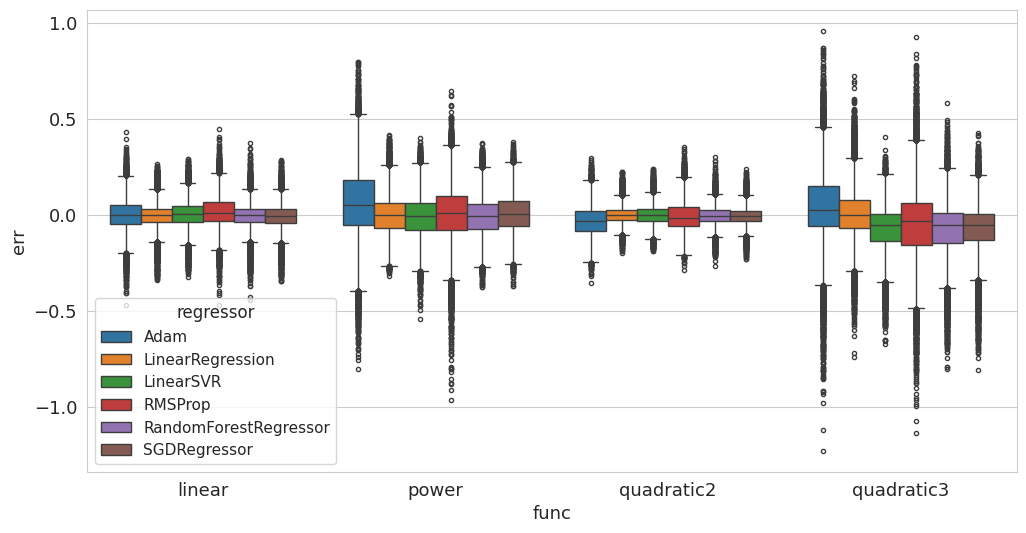

In [48]:
plt.figure(figsize=(12, 6))
psnr_df = pred_df[pred_df["target"] == "bitrate"]

psnr_df_cleaned = pd.DataFrame()
for regressor in psnr_df["regressor"].unique():
    for func in psnr_df["func"].unique():
        df = psnr_df[(psnr_df["func"] == func) & (psnr_df["regressor"] == regressor)]
        df = rm_outliers(df, cols=["err"], threshold=1.25)
        psnr_df_cleaned = pd.concat([psnr_df_cleaned, df], ignore_index=True)
sns.boxplot(data=pred_df[pred_df["target"] == "log2psnr"], x="func", y="err", hue="regressor", flierprops=flierprops)

##### log2ssim 最适合 quadratic2 或 linear 函数拟合，然后用任意一种 regressor 效果都差不多

(-0.5, 0.5)

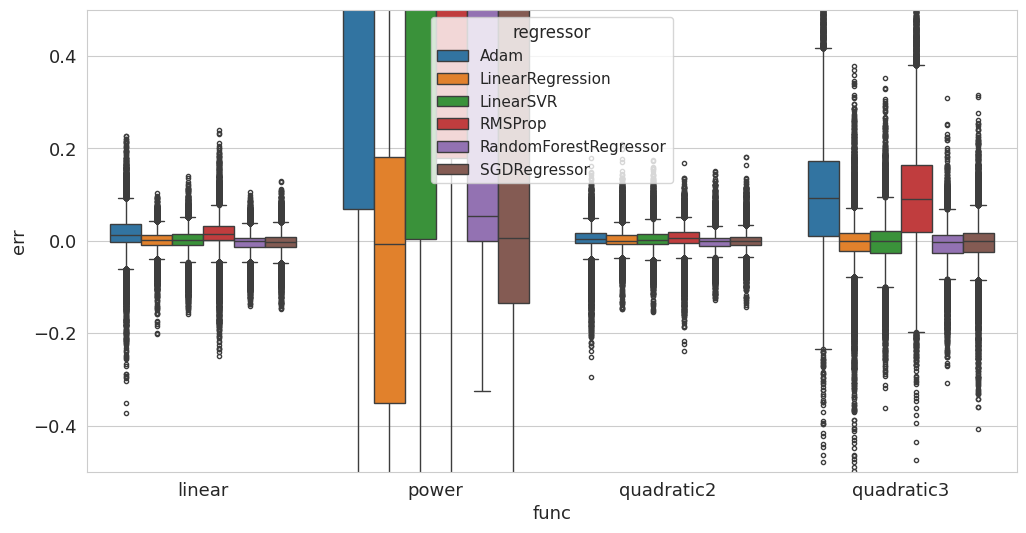

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=pred_df[pred_df["target"] == "log2ssim"], x="func", y="err", hue="regressor", flierprops=flierprops)
plt.ylim(-0.5, 0.5)

##### log2vmaf 最适合 quadratic2 或 linear 函数拟合，然后用任意一种 regressor 效果都差不多

<Axes: xlabel='func', ylabel='err'>

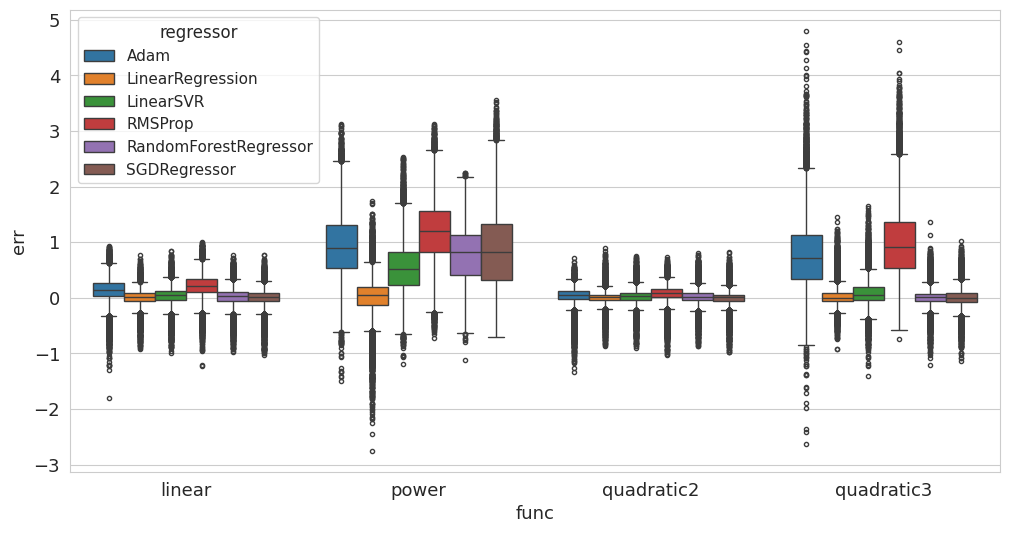

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=pred_df[pred_df["target"] == "log2vmaf"], x="func", y="err", hue="regressor", flierprops=flierprops)
# plt.ylim(-0.3, 0.3)